PHASE 1 PROJECT

**Specifying the Data Analytic Question**

Microsoft have been seeing other companies creating video content and have
decided to create a new movie studio,but they do not know how to create movies.


***problem statement***
You have to understand the movie industry what it is about and what it entails. What kind/types of 
films are currently trending at the box office. You must gather the findings into actionable insights
and visuals, so that the Stakeholders can undertstand what/ the kind of films that their target 
audience like.

DATA UNDERSTANDING


we have been provided with data from different movie sites and files that contain data. From the data that we have been given we see that movies involve alot of people and things that have to be put into consideration. This things are :-
 
 - What kind of movies or genre do people like?

 - Do movies give a good return in terms of profit?

 - what are the ratings of the movie and do they affect anything?

 - which studios are your competitors in the the industry?


IMPORTING THE LIBRARIES

In [1]:
#Importing libraries

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import seaborn as sns

CONNECTING TO THE DATABASE 

In [2]:
# connecting to database using sqlite3
import sqlite3
conn =sqlite3.connect(r'C:\Users\user\Documents\Moringa\im.db database\im.db')
cur= conn.cursor()

READING THE DATABASE

In [3]:
pd.read_sql("""
            SELECT * 
            FROM sqlite_master 
            WHERE type = 'table' ;
            """, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


READING THE FILES

In [4]:
#Reading a csv file
movie_bom = pd.read_csv("bom.movie_gross.csv")
movie_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
#Inspecting the data
# Previewing the first 5 rows
movie_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
#Inspecting the data
# Previewing the last 5 rows
movie_bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
#THE NUMBER OF RECORDS IN A DATASET
#The length of rows in the dataframe in movie_bom
length_movie_bom =len(movie_bom)
length_movie_bom

3387

In [8]:
#CHECKING EACH COLUMN HAS AN APPROPRIATE DATATYPE
#looking for the column and datatypes in movie_bom using .info()
movie_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#CLEANING THE DATASET
#looking for duplicates
movie_bom.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [10]:
#CLEANING THE DATASET
#looking for duplicates (false means row has not been duplicated and true means that the row has been duplicated)
movie_bom.duplicated().any()

False

In [11]:
#Checking for missing data
#True is equivalent to 1 and False is equivalent to 0, taking the .sum() will return the total number of NaN values in the dataset.
#(.isnull().sum() also gives the same answer)
movie_bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [12]:
#Removing missing data
df = movie_bom
df.dropna(axis= 0, subset= ['foreign_gross'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [13]:
#Removing missing data in foreign_gross because they are too many missing data.
df = movie_bom
df.drop(['foreign_gross'], axis= 1, inplace= True)
df

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3275,I Still See You,LGF,1400.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,2018
3309,Time Freak,Grindstone,10000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,2018


In [14]:
#confirming that the foreign_gross column has been removed
df    # it has been deleted/ removed

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3275,I Still See You,LGF,1400.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,2018
3309,Time Freak,Grindstone,10000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,2018


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


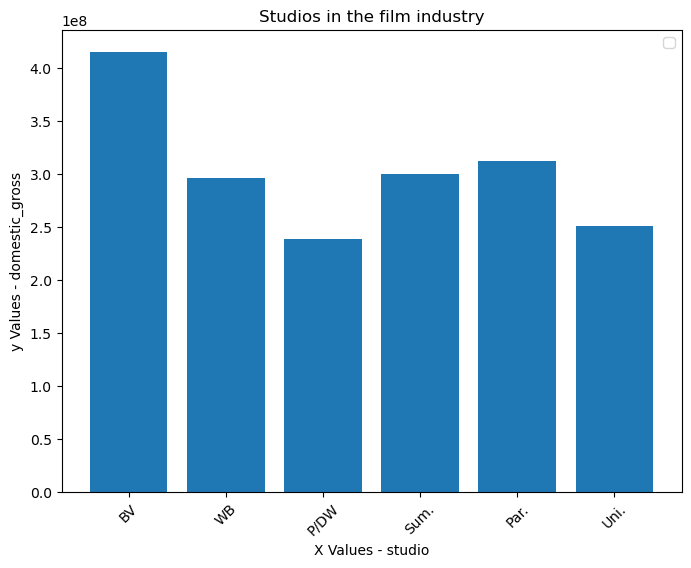

In [25]:
#plotting a bargraph to look at the ratings 

plt.figure(figsize=(8,6))

# df['new_alone_genres'] =df['genres'].str.split(',')
# df =df .explode('new_alone_genres')

x = movie_bom['studio'].head(10)
y = movie_bom['domestic_gross'].head(10)

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y)

plt.xlabel('X Values - studio')
plt.ylabel('y Values - domestic_gross')

plt.title('Studios in the film industry')
plt.legend()
plt.xticks(rotation=45)

# Output the final plot
plt.show()

READING TITLE RATINGS

In [15]:
#Reading a csv file
title_ratings= pd.read_csv('title.ratings.csv')
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [16]:
#Inspecting the data
# Previewing the first 5 rows
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
#Inspecting the data
# Previewing the last 5 rows
title_ratings.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [18]:
#THE NUMBER OF RECORDS IN A DATASET
#The length of rows in the dataframe in title_ratings
length_title_ratings=len(title_ratings)
length_title_ratings

73856

In [19]:
#CHECKING EACH COLUMN HAS AN APPROPRIATE DATATYPE
#looking for the column and datatypes in title_ratings using .info()
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
#CLEANING THE DATASET
#looking for duplicates
title_ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [21]:
#CLEANING THE DATASET
#looking for duplicates
title_ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [22]:
#Checking for missing data
#True is equivalent to 1 and False is equivalent to 0, taking the .sum() will return the total number of NaN values in the dataset.
#(.isnull().sum() also gives the same answer)
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


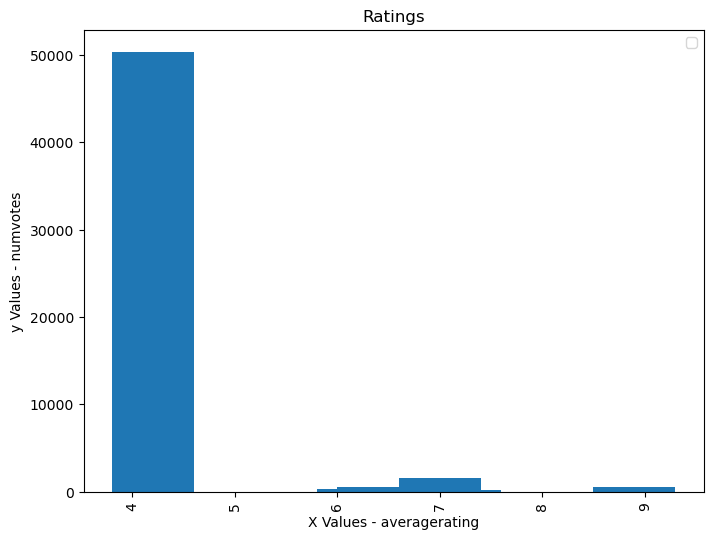

In [ ]:
#plotting a bargraph to look at the ratings 

plt.figure(figsize=(8,6))

# df['new_alone_genres'] =df['genres'].str.split(',')
# df =df .explode('new_alone_genres')

x = title_ratings['averagerating'].head(10)
y = title_ratings['numvotes'].head(10)

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y)

plt.xlabel('X Values - averagerating')
plt.ylabel('y Values - numvotes')

plt.title('Ratings')
plt.legend()
plt.xticks(rotation=90)

# Output the final plot
plt.show()


READING TITLE BASIC

In [ ]:
#Reading a csv file
title_basic = pd.read_csv('title.basics.csv')
title_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [ ]:
#Inspecting the data
# Previewing the first 5 rows
title_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#Inspecting the data
# Previewing the last 5 rows
title_basic.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [ ]:
#THE NUMBER OF RECORDS IN A DATASET
#The length of rows in the dataframe in title_basic
length_title_basic=len(title_basic)
length_title_basic

146144

In [ ]:
#CHECKING EACH COLUMN HAS AN APPROPRIATE DATATYPE
#looking for the column and datatypes in title_basic using .info()
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
#CLEANING THE DATASET
#looking for duplicates
title_basic.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool

In [ ]:
#Checking for missing data
#True is equivalent to 1 and False is equivalent to 0, taking the .sum() will return the total number of NaN values in the dataset.
#(.isnull().sum() also gives the same answer)
title_basic.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [ ]:
#Removing missing data in runtime_minutes because the missing data was alot.
df = title_basic
df.drop(['runtime_minutes'], axis= 1, inplace= True)
df

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,NaN


In [ ]:
#confirming that the runtime_minutes has been removed
df    # it has been deleted/ removed

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


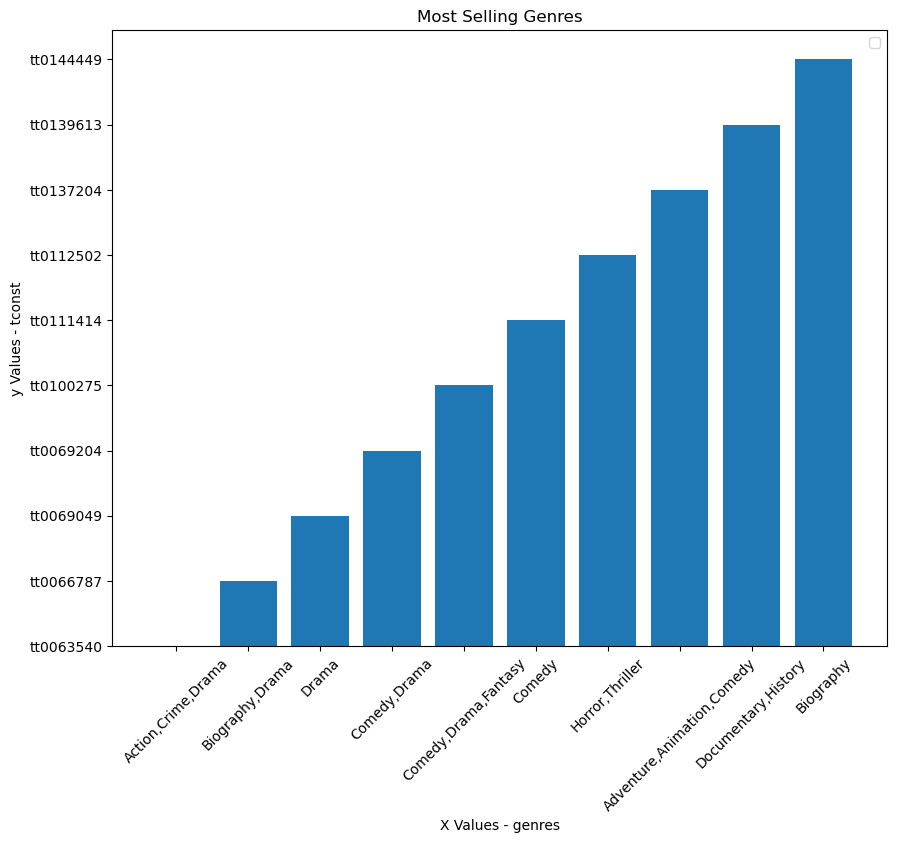

In [ ]:
#plotting a bargraph to see which movie genres are selling the most
plt.figure(figsize=(10,8))

# df['new_alone_genres'] =df['genres'].str.split(',')
# df =df .explode('new_alone_genres')

x = title_basic ['genres'].head(10)
y = title_basic['tconst'].head(10)

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y)

plt.xlabel('X Values - genres')
plt.ylabel('y Values - tconst')

plt.title('Most Selling Genres')
plt.legend()
plt.xticks(rotation=45)

# Output the final plot
plt.show()



Reading Table movie budget

In [ ]:
#Reading a tsv file using a csv reader
movie_budgets_data= pd.read_csv("tn.movie_budgets.csv")
movie_budgets_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
#INSPECTING THE DATA
# Previewing the first 5 rows
movie_budgets_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
#INSPECTING THE DATA
# Previewing the last 5 rows
movie_budgets_data.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
#THE NUMBER OF RECORDS IN A DATASET
#The length of rows in the dataframe in movie_budgets_data
length_movie_budgets_data = len(movie_budgets_data)
length_movie_budgets_data

5782

In [ ]:
#CHECKING EACH COLUMN HAS AN APPROPRIATE DATATYPE
#looking for the column and datatypes in movie_budgets_data using .info()
movie_budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
#CLEANING THE DATASET
#looking for duplicates
movie_budgets_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [ ]:
#CLEANING THE DATASET
#looking for duplicates(false means row has not been duplicated and true means that the row has been duplicated)
movie_budgets_data.duplicated().any()

False

In [ ]:
#Checking for missing data
#True is equivalent to 1 and False is equivalent to 0, taking the .sum() will return the total number of NaN values 
#in the dataset.

movie_budgets_data.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
#Removing missing data in runtime_minutes because the missing data was alot.
df = movie_budgets_data
df.drop(['release_date',], axis= 1, inplace= True )
df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
df = movie_budgets_data
df.drop(['id'], axis= 1, inplace= True )
df

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
#removing/ stripping the characters
df['worldwide_gross']=df['worldwide_gross'].str.replace("$","").str.replace(",", "")
df['domestic_gross']=df['domestic_gross'].str.replace("$","").str.replace(",", "")
df['production_budget']=df['production_budget'].str.replace("$","").str.replace(",", "")
df.head(8)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,Avengers: Infinity War,300000000,678815482,2048134200
7,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


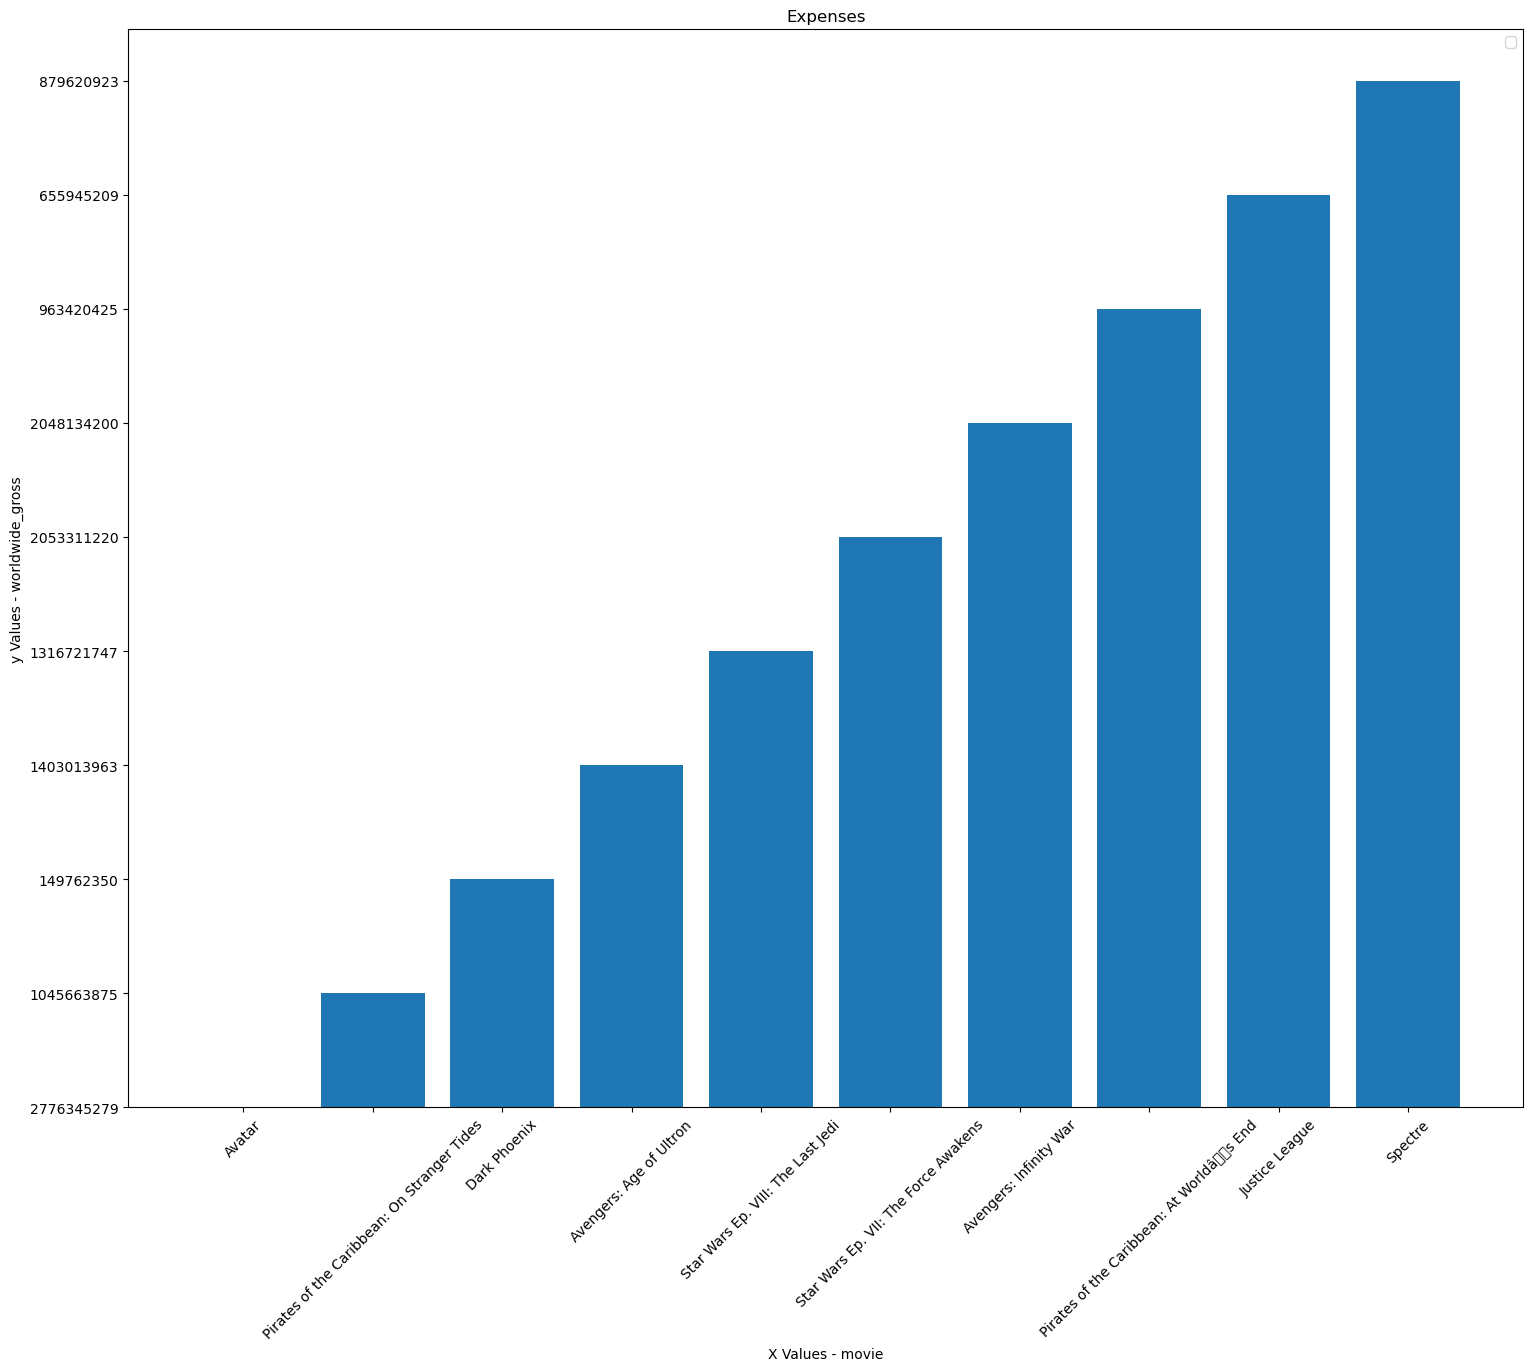

In [ ]:
#plotting a bar graph and looking for the worldwide_gross
# putting the size of the figure to be plotted
plt.figure(figsize=(18,14))

x = df ['movie'].head(10)
y = df['worldwide_gross'].head(10)

# Using the bar() function to create a plot using the above values of x and y. Adding a label.
plt.bar(x, y)

plt.xlabel('X Values - movie')
plt.ylabel('y Values - worldwide_gross')

plt.title('Expenses')
plt.legend()
plt.xticks(rotation=45)

# Output the final plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


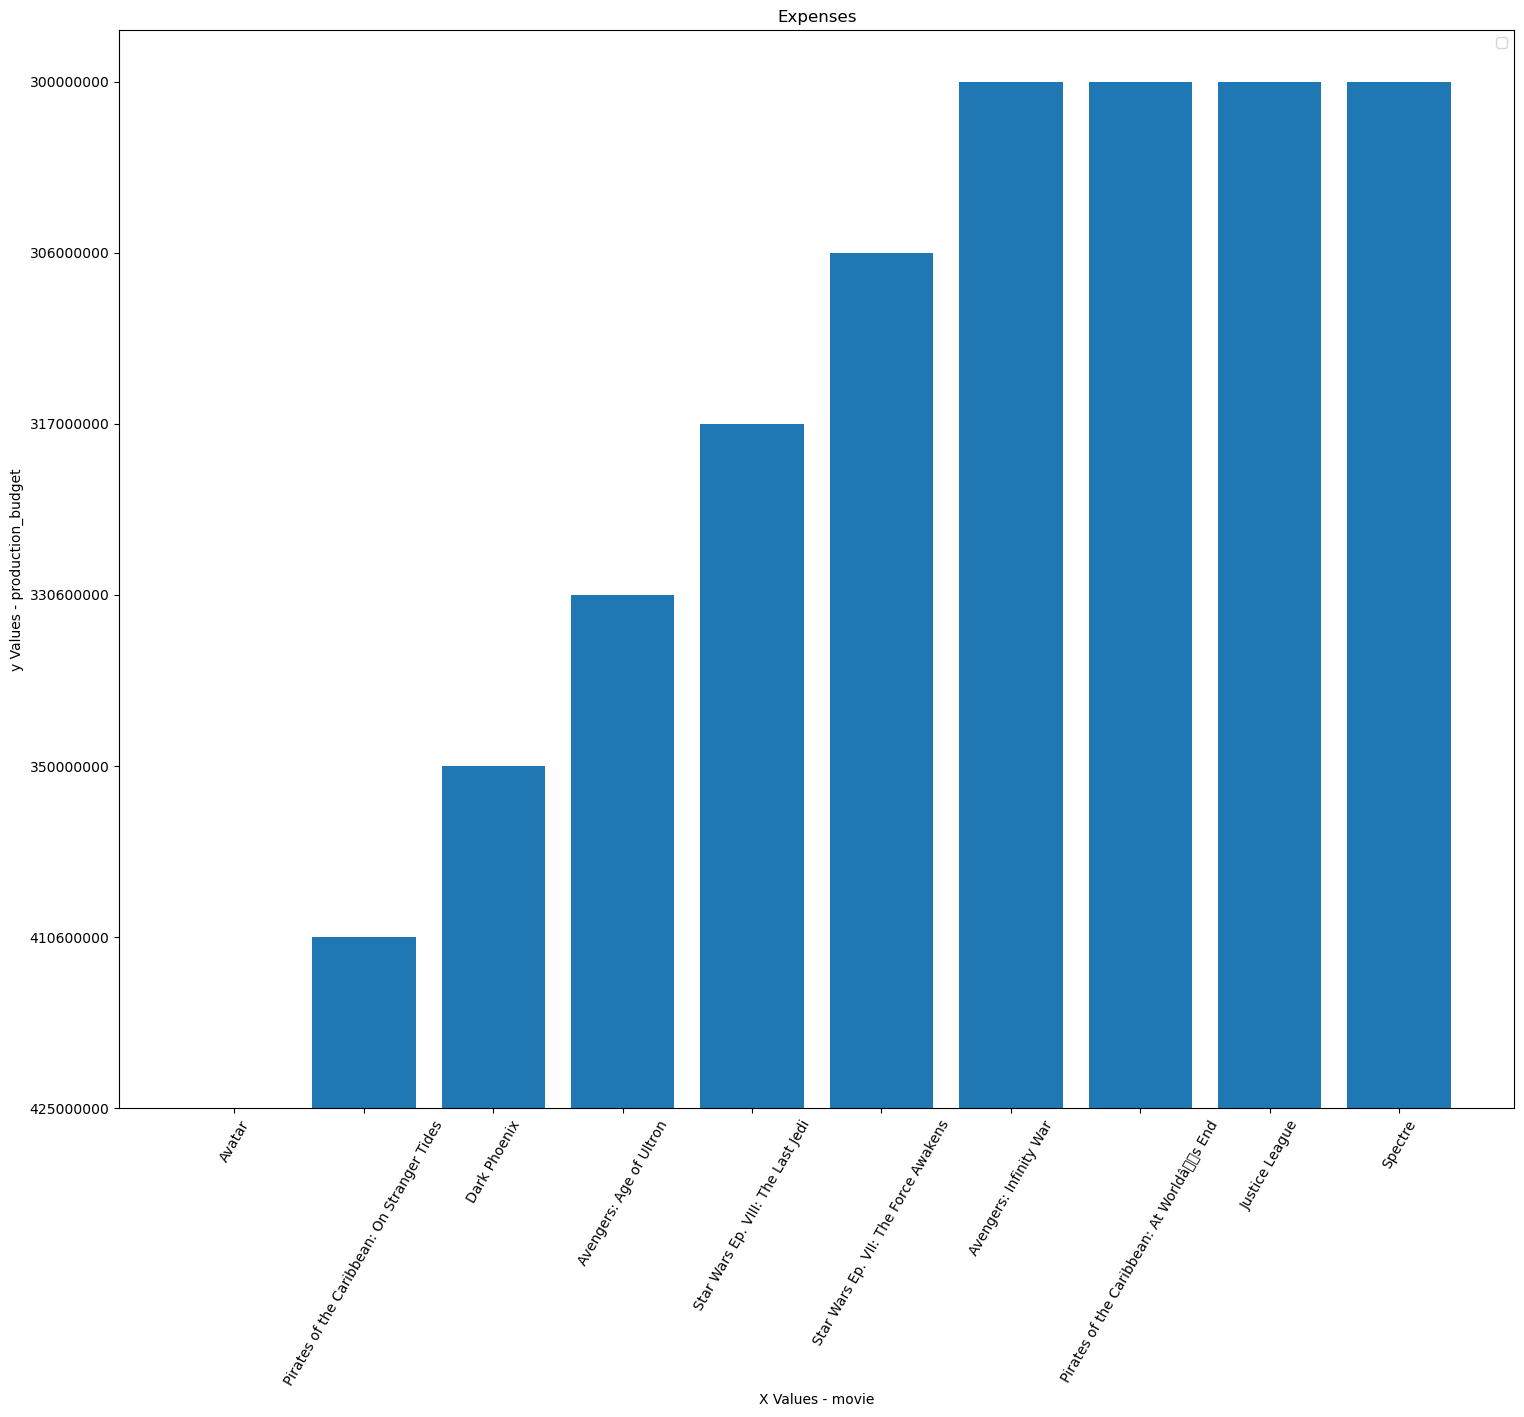

In [ ]:

#plotting a bar graph and looking for the production budget 
plt.figure(figsize=(18,14))

x = df ['movie'].head(10)
y = df['production_budget'].head(10)

# Using the bar() function to create a plot using the above values of x and y. Adding a label.
plt.bar(x, y)

plt.xlabel('X Values - movie')
plt.ylabel('y Values - production_budget')

plt.title('Expenses')
plt.legend()
plt.xticks(rotation=60)

# Output the final plot
plt.show()

In [ ]:
#using the .describe method
#df[['production_budget', 'domestic_gross','worldwide_gross']].describe()
df=movie_budgets_data
df[['worldwide_gross']].describe()

,worldwide_gross
count,5782
unique,5356
top,0
freq,367
